In [100]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

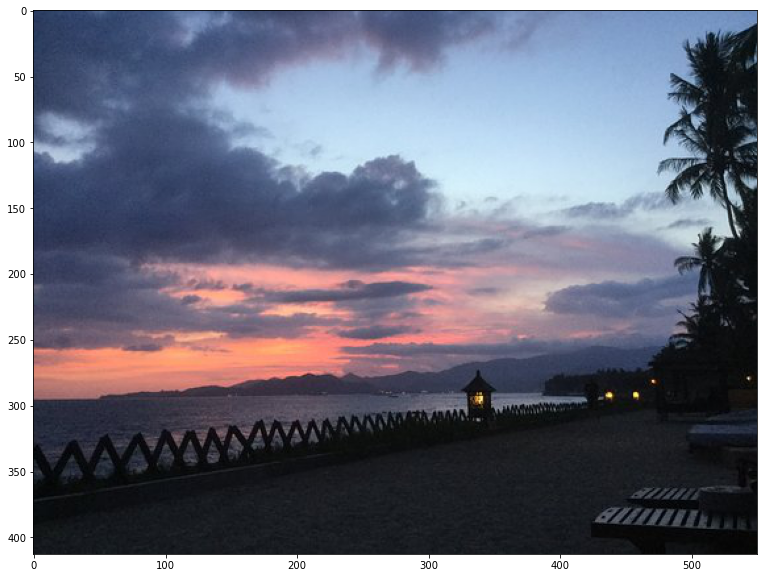

In [101]:
# Load image
img = cv2.imread('data/evening.jpg')
# Convert it to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Plot it
plt.imshow(img)

In [102]:
# Black, dark gray, light gray, white
colors = np.array([[0, 0, 0],
                   [64, 64, 64],
                   [192, 192, 192],
                   [255, 255, 255]])

In [103]:
# Cast the image to float
# img = np.zeros_like(img, dtype=np.float32)
img = np.array(img, dtype='float32')

# Prepare for quantization
rows, cols, channels = img.shape
quantized = np.zeros_like(img)

# # Apply quantization
for r in range(rows):
    for c in range(cols):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel = colors[np.argmin([np.linalg.norm(pixel-color) for color in colors])]
        
        # Apply quantization
        quantized[r, c, :] = new_pixel

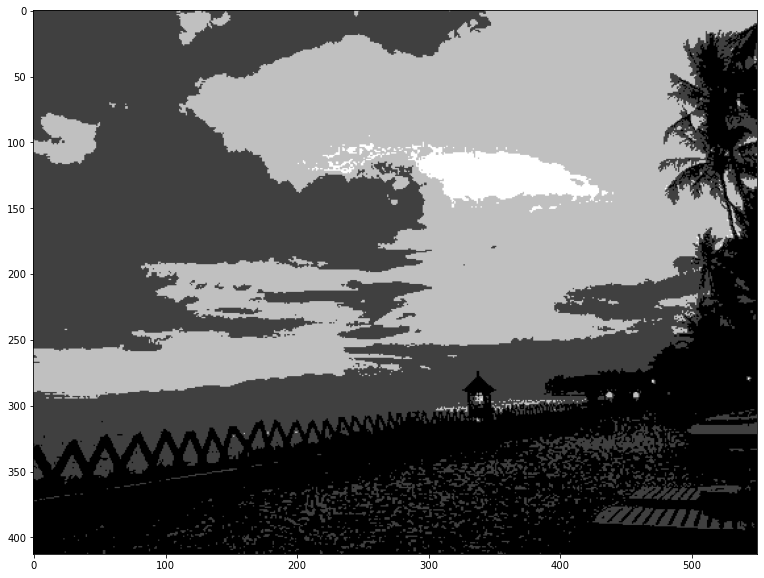

In [104]:
# Show quantized image (don't forget to cast back to uint8)
quantized = quantized.astype(np.uint8)
plt.imshow(quantized)

In [105]:
# Compute average quantization error
avg_quant_error = np.array(pixel) - np.array(new_pixel)

In [118]:
# Make a temporal copy of the original image, we will need it for error diffusion
img_tmp = np.copy(img)
dithering = np.zeros_like(img)

for r in range(1, rows-1):
    for c in range(1, cols-1):
        # Extract the original pixel value
        pixel = list(img[r, c, :])
        
        # Find the closest colour from the pallette (using absolute value/Euclidean distance)
        # Note: You may need more than one line of code here
        new_pixel =  colors[np.argmin([np.linalg.norm(pixel-color) for color in colors])]
        
         # Apply quantization
        img_tmp[r, c, :] = new_pixel

        # Compute quantization error
        quant_error = np.array(pixel) - np.array(new_pixel)
        
        new_pixel = list(img_tmp[r+1, c, :]) + quant_error * 7 / 16
        new_pixel = list(img_tmp[r-1, c+1, :]) + quant_error * 3 / 16
        new_pixel = list(img_tmp[r, c+1, :]) + quant_error * 5 / 16
        new_pixel = list(img_tmp[r+1, c+1, :]) + quant_error * 1 / 16
        
        # Diffuse the quantization error accroding to the FS diffusion matrix
        # Note: You may need more than one line of code here
        img_tmp[r, c, :] = pixel
        
        # Apply dithering
        dithering[r, c, :] = new_pixel

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1c0aeb95a90>)

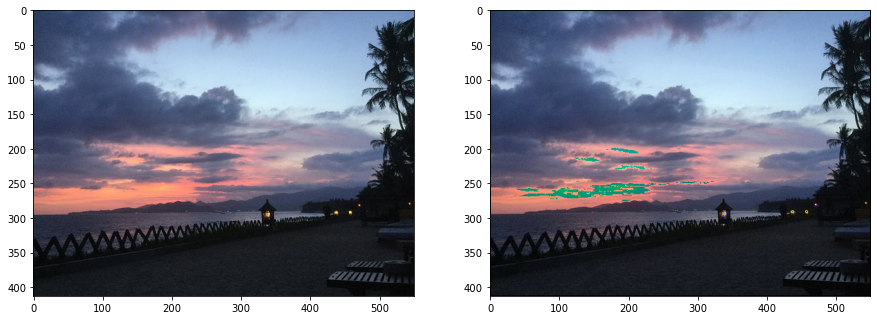

In [119]:
# Show quantized image (don't forget to cast back to uint8)
img_tmp = img_tmp.astype(np.uint8)
dithering = dithering.astype(np.uint8)
plt.subplot(121), plt.imshow(img_tmp)   # optimally quantized
plt.subplot(122), plt.imshow(dithering)   # dithering

In [ ]:
# Compute average quantization error for dithered image
avg_dith_error = 

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16).fit(np.reshape(img, (-1, 1)))
colors = kmeans.cluster_centers_